# Hello Graph World

This notebook will focus on creating the nodes and edges for a basic graph, such as the Krackhardt kite. Our data of choice will be using Disney+ Streaming service of their movies and TV Shows where we can look into the relationship of directors and the genres they create. The data can be acquired from Kaggle [here](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows/data). 

In [61]:
## Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [62]:
## Import Dataset
df = pd.read_csv('disney_plus_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [63]:
director_genre_df = df[['director', 'listed_in']]
director_genre_df = director_genre_df.rename(columns = {'listed_in':'genre'})

director_genre_df.head()

,director,genre
0,"Alonso Ramirez Ramos, Dave Wasson","Animation, Family"
1,John Cherry,Comedy
2,Karen Disher,"Animation, Comedy, Family"
3,Hamish Hamilton,Musical
4,NaN,"Docuseries, Historical, Music"


In [64]:
director_genre_df['director'] = director_genre_df['director'].str.split(", ")
director_genre_df['genre'] = director_genre_df['genre'].str.split(", ")
director_genre_df

,director,genre
0,"[Alonso Ramirez Ramos, Dave Wasson]","[Animation, Family]"
1,[John Cherry],[Comedy]
2,[Karen Disher],"[Animation, Comedy, Family]"
3,[Hamish Hamilton],[Musical]
4,NaN,"[Docuseries, Historical, Music]"
...,...,...
1445,[Gavin Hood],"[Action-Adventure, Family, Science Fiction]"
1446,[Shawn Levy],"[Action-Adventure, Comedy, Family]"
1447,[Dexter Fletcher],"[Biographical, Comedy, Drama]"
1448,[Gurinder Chadha],"[Buddy, Comedy, Coming of Age]"


In [65]:
explode_df = director_genre_df.explode(['director'])
explode_df = explode_df.explode(['genre'])
explode_df.head()

,director,genre
0,Alonso Ramirez Ramos,Animation
0,Alonso Ramirez Ramos,Family
0,Dave Wasson,Animation
0,Dave Wasson,Family
1,John Cherry,Comedy


In [66]:
G = nx.from_pandas_edgelist(explode_df, "director", "genre")

/Users/johncruz/Documents/GitHub/Social-Network-Analysis/chapter2/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26417 (\N{CJK UNIFIED IDEOGRAPH-6731}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/johncruz/Documents/GitHub/Social-Network-Analysis/chapter2/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/johncruz/Documents/GitHub/Social-Network-Analysis/chapter2/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27427 (\N{CJK UNIFIED IDEOGRAPH-6B23}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/johncruz/Documents/GitHub/Social-Network-Analysis/chapter2/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38047 (\N{CJK UNIFIED IDEOGRAPH-949F}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/johncruz/Documents/Gi

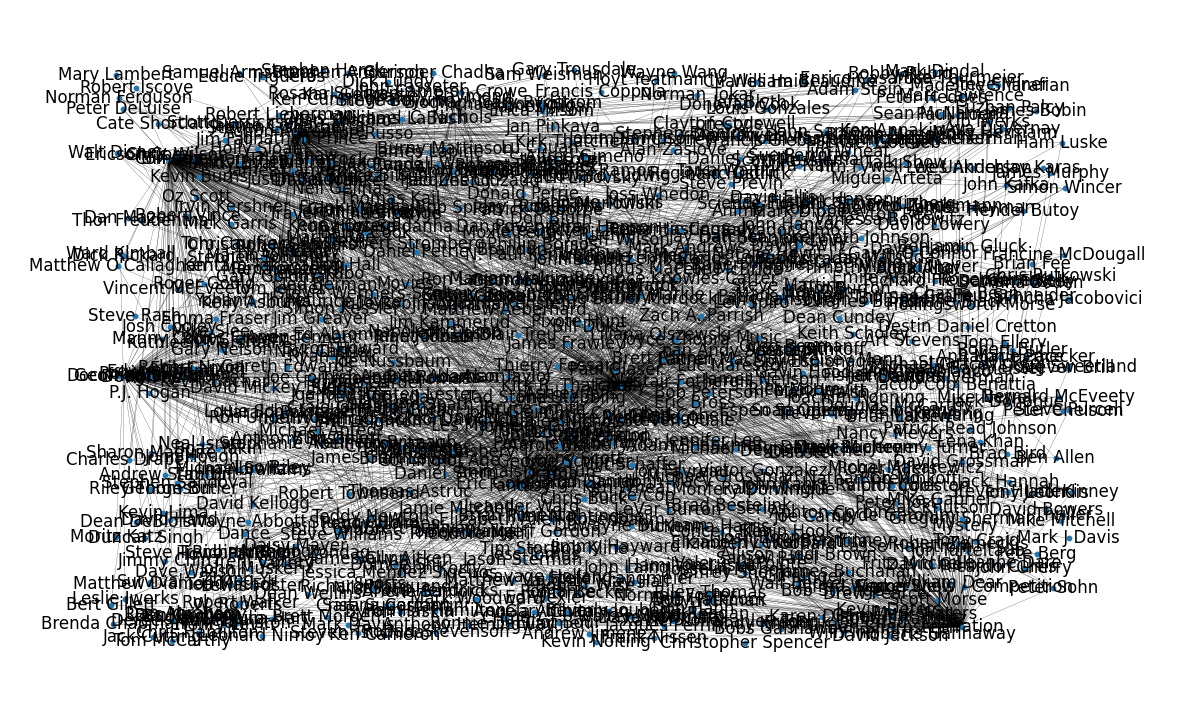

In [67]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": True, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

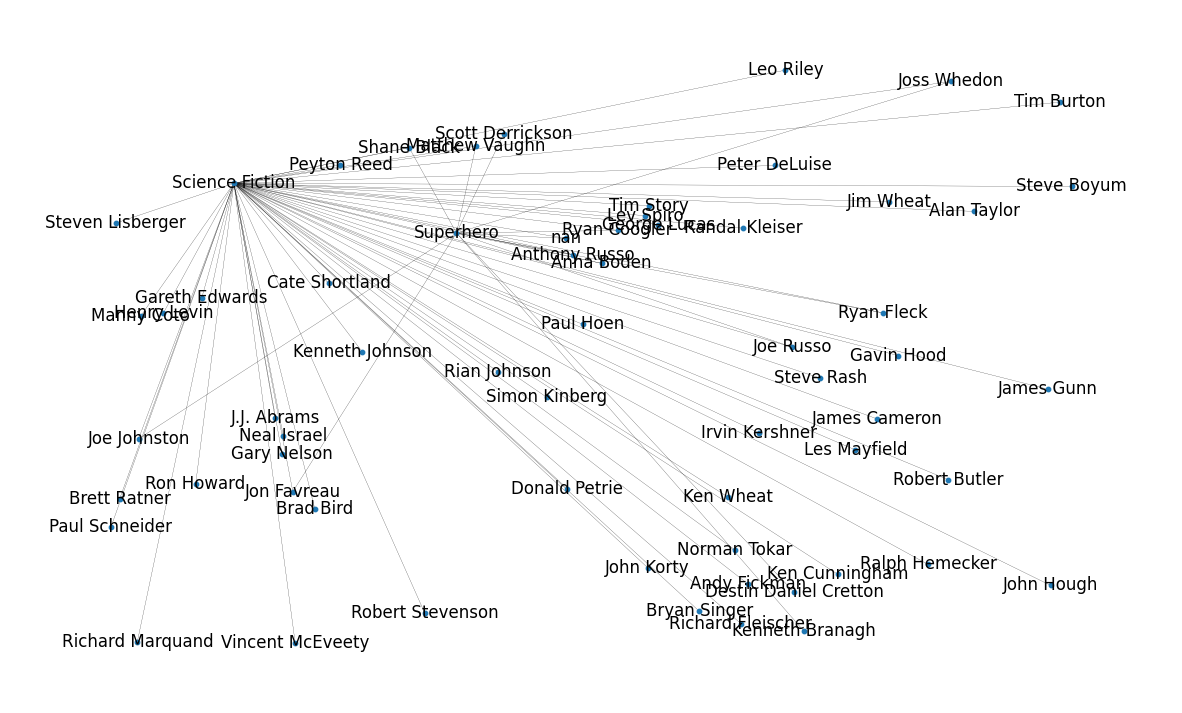

In [68]:
genre_df = explode_df[explode_df['genre'].isin(['Superhero', 'Science Fiction'])]
G = nx.from_pandas_edgelist(genre_df, "director", "genre")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": True, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

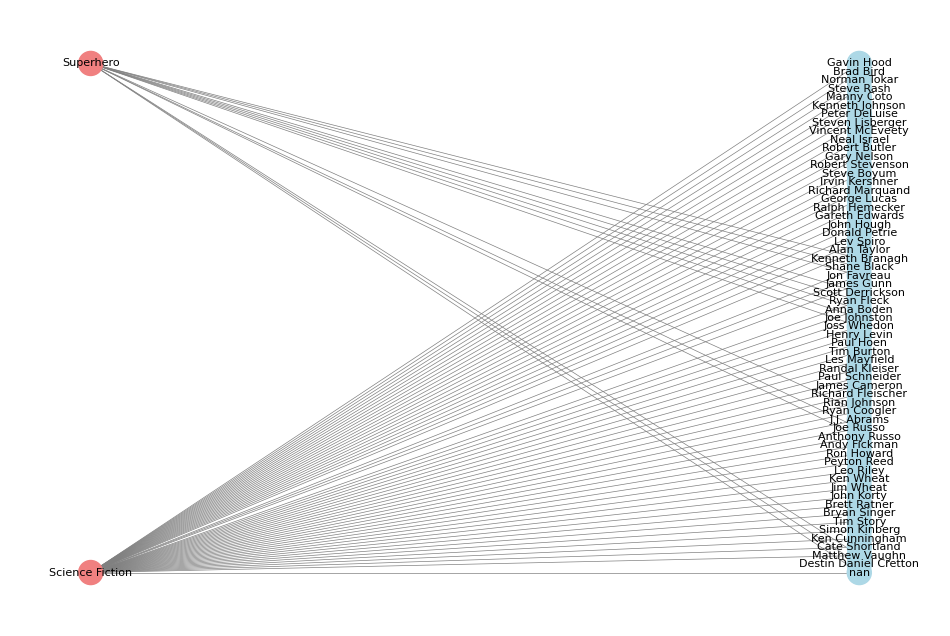

In [69]:
# Create Graph (Bipartite)
G = nx.from_pandas_edgelist(genre_df, "director", "genre")

# Determine node categories
directors = set(genre_df["director"])
genres = set(genre_df["genre"])

# Set node colors
color_map = ["lightblue" if node in directors else "lightcoral" for node in G.nodes]

# Use bipartite layout for better separation
pos = nx.bipartite_layout(G, genres)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")

nx.draw(
    G, 
    pos, 
    ax=ax, 
    node_color=color_map, 
    edge_color="gray",
    node_size=300, 
    with_labels=True,
    font_size=8, 
    width=0.5
)
plt.show()
